# Assignment 2
## Taso Kinnas, Kevin Kirchhoff
### https://boisestate.github.io/CS533/assignments/assignment2.html

In [1]:
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [2]:
artists = read_tsv('data/hetrec2011-lastfm-2k/artists.dat')
tags = read_tsv('data/hetrec2011-lastfm-2k/tags.dat')
plays = read_tsv('data/hetrec2011-lastfm-2k/user_artists.dat')
user = read_tsv('data/hetrec2011-lastfm-2k/user_taggedartists.dat')
friends = read_tsv('data/hetrec2011-lastfm-2k/user_friends.dat')
time = read_tsv('data/hetrec2011-lastfm-2k/user_taggedartists-timestamps.dat')

Parsed with column specification:
cols(
  id = col_integer(),
  name = col_character(),
  url = col_character(),
  pictureURL = col_character()
)
Warning message in rbind(names(probs), probs_f):
“number of columns of result is not a multiple of vector length (arg 2)”Warning message:
“1 parsing failure.
row # A tibble: 1 x 5 col     row   col           expected actual                                    file expected   <int> <chr>              <chr>  <chr>                                   <chr> actual 1  1678  name delimiter or quote        'data/hetrec2011-lastfm-2k/artists.dat' file # A tibble: 1 x 5
”Parsed with column specification:
cols(
  tagID = col_integer(),
  tagValue = col_character()
)
Parsed with column specification:
cols(
  userID = col_integer(),
  artistID = col_integer(),
  weight = col_integer()
)
Parsed with column specification:
cols(
  userID = col_integer(),
  artistID = col_integer(),
  tagID = col_integer(),
  day = col_integer(),
  month = col_integer(),
  year

In [3]:
head(artists,1)
head(tags,1)
head(plays,1)
head(user,1)
head(friends,1)
head(time,1)

id,name,url,pictureURL
1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg


tagID,tagValue
1,metal


userID,artistID,weight
2,51,13883


userID,artistID,tagID,day,month,year
2,52,13,1,4,2009


userID,friendID
2,275


userID,artistID,tagID,timestamp
2,52,13,1.238537e+12


# Answer the following questions:















## Exploring the Data

### Extended Table

In [4]:
# select 'plays' table
play_summary = plays %>%
    # group by artistID
    group_by(artistID) %>%
    # number of users that play that artist
    # and total number of times artist is played
    summarize(userCount=n(), totalPlays=sum(weight)) %>%
    # join 'plays' & 'artists' datasets on artistID
    # show artistID, userCount, totalPlays, name
    inner_join(select(artists, artistID=id, name=name))

head(arrange(play_summary, desc(totalPlays)), 10)

Joining, by = "artistID"


artistID,userCount,totalPlays,name
289,522,2393140,Britney Spears
72,282,1301308,Depeche Mode
89,611,1291387,Lady Gaga
292,407,1058405,Christina Aguilera
498,399,963449,Paramore
67,429,921198,Madonna
288,484,905423,Rihanna
701,319,688529,Shakira
227,480,662116,The Beatles
300,473,532545,Katy Perry


In [5]:
# select 'plays' table
user_summary = plays %>%
    # group by artistID
    group_by(userID) %>%
    # number of users that play that artist
    # and total number of times artist is played
    summarize(artistCount=n(), totalPlays=sum(weight)) 
    # join 'plays' & 'artists' datasets on artistID
    # show artistID, userCount, totalPlays, name
    ## inner_join(select(artists, artistID=id))

head(user_summary, 10)

userID,artistCount,totalPlays
2,50,168737
3,50,20501
4,50,26930
5,50,13159
6,50,1011
7,50,135399
8,50,36279
9,50,25597
10,50,28523
11,50,42920


1) Plot the distribution of play counts per artist

artistID,totalPlays
289,2393140
72,1301308
89,1291387
292,1058405
498,963449
67,921198
288,905423
701,688529
227,662116
300,532545


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


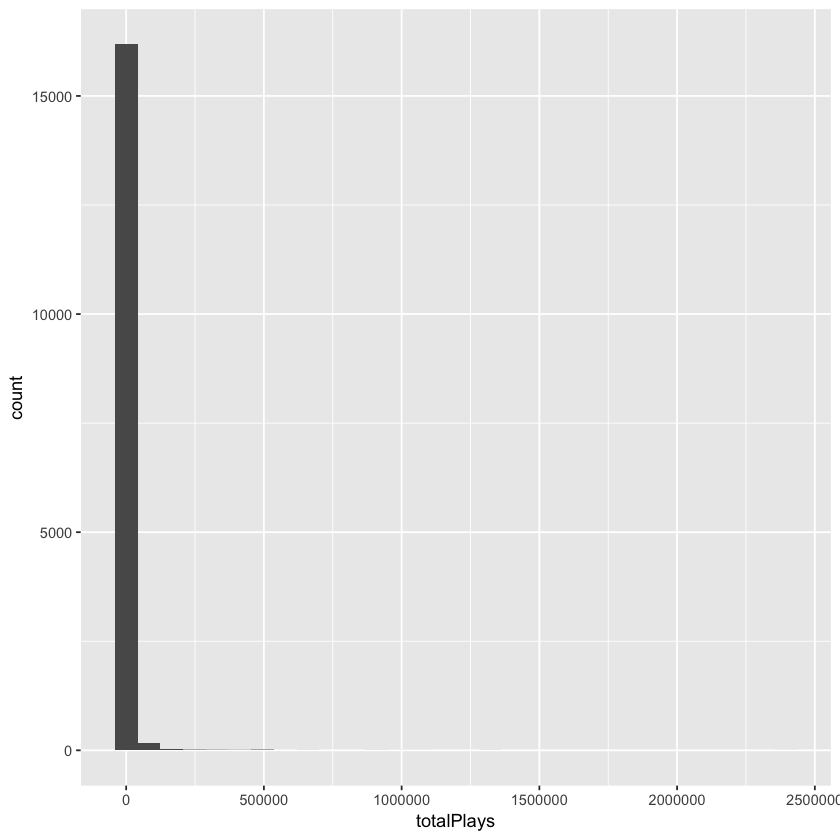

In [6]:
# get only artistID and totalPlays
artist_playcount = select(play_summary, artistID, totalPlays)
# show only first 10 row of modified table, 
# sorted on most plays
head(arrange(artist_playcount, desc(totalPlays)),10)

# distribution of play counts per artist
ggplot(artist_playcount, aes(totalPlays)) +
    geom_histogram()

2) Plot the distribution of unique users playing each artist

artistID,userCount
89,611
289,522
288,484
227,480
300,473
67,429
333,417
292,407
190,400
498,399


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


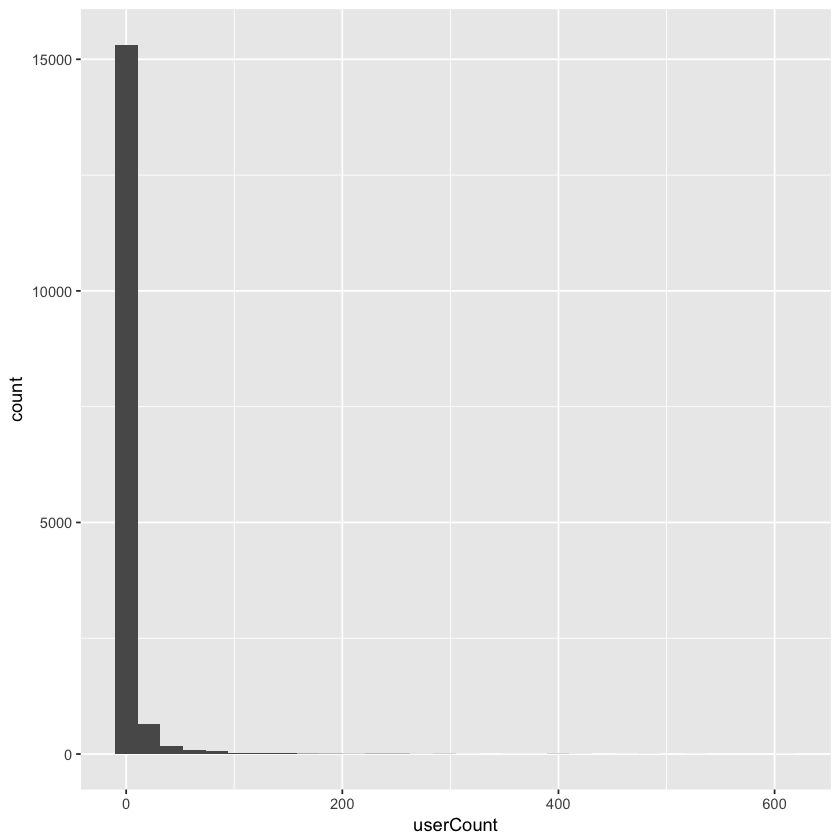

In [7]:
# get only artistID and userCount
artist_users = select(play_summary, artistID, userCount)
# show only first 10 row of modified table, 
# sorted on most plays
head(arrange(artist_users, desc(userCount)),10)

# distribution of play counts per artist
ggplot(artist_users, aes(userCount)) +
    geom_histogram()

3) Plot the distribution of play counts per user

userID,totalPlays
757,480039
2000,468409
1418,416349
1642,388251
1094,379125
1942,348527
2071,338400
2031,329980
514,329782
387,322661


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


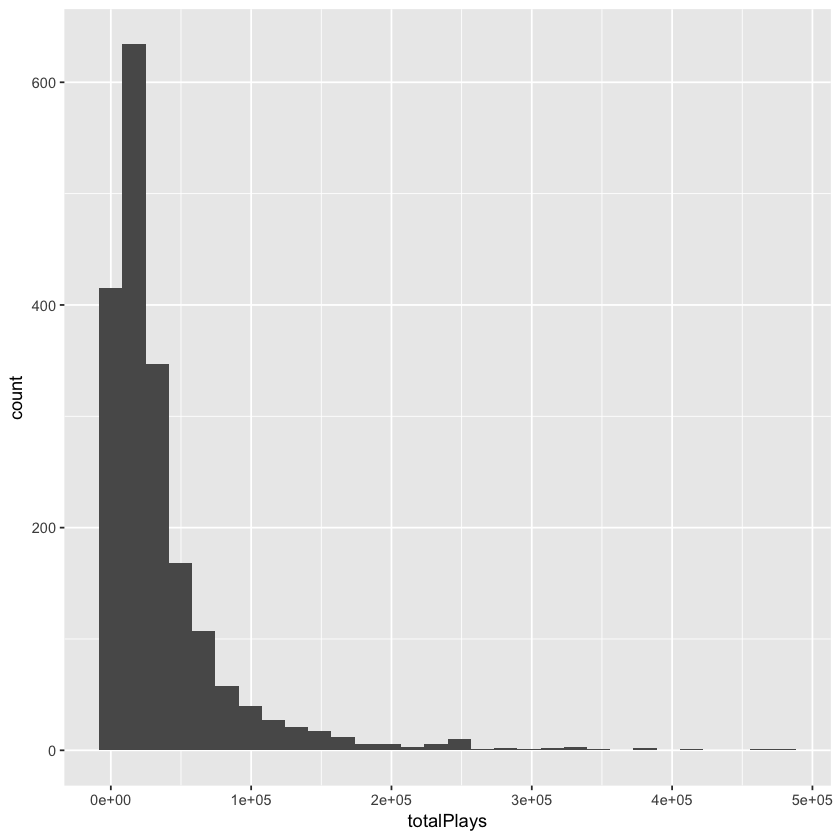

In [8]:
# get only userCount and playCount
user_playcounts = select(user_summary, userID, totalPlays)
# show only first 10 row of modified table, 
# sorted on most plays
head(arrange(user_playcounts, desc(totalPlays)),10)

# distribution of play counts per artist
ggplot(user_playcounts, aes(totalPlays)) +
    geom_histogram()

4) Plot the distribution of unique artists per user

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


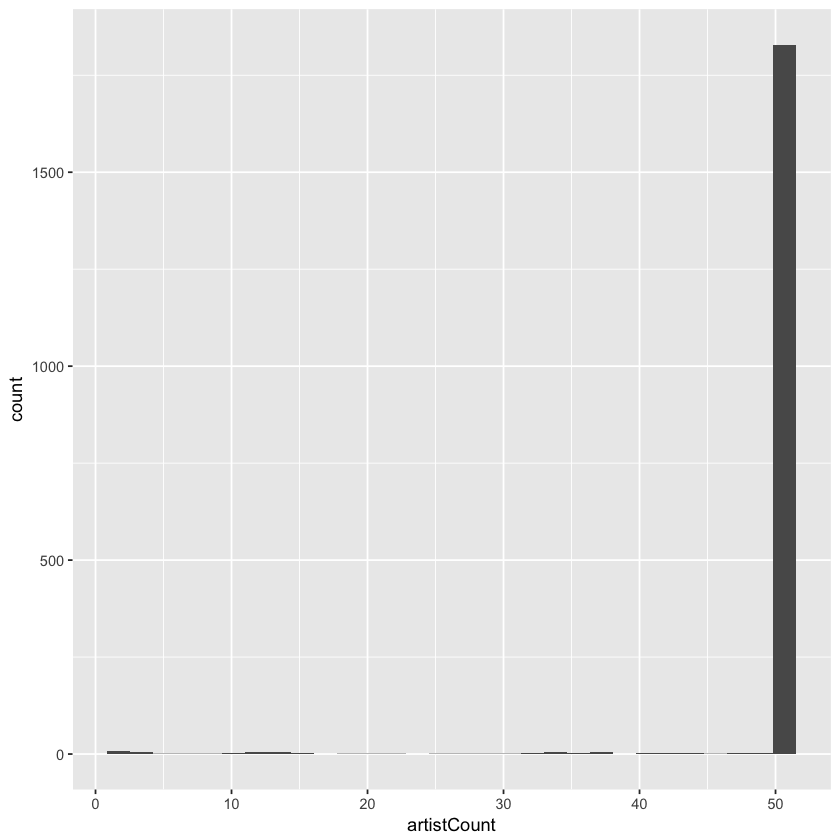

In [9]:
ggplot(user_summary, aes(artistCount)) +
    geom_histogram()

5a) What is the mean artists-per-user?  

In [10]:
mean(user_summary$artistCount)

[1] 49.0666

5b) Users-per-artist?

In [11]:
mean(play_summary$userCount)

[1] 5.055593

5c) Plays per user/artist pair?

In [12]:
mean(plays$weight)

[1] 745.2439

6) What are the 10 artists with the most plays?

In [13]:
head(arrange(artist_playcount, desc(totalPlays)),10)

artistID,totalPlays
289,2393140
72,1301308
89,1291387
292,1058405
498,963449
67,921198
288,905423
701,688529
227,662116
300,532545


7) What are the 10 artists with the most unique playing users?

In [14]:
head(arrange(artist_users, desc(userCount)),10)

artistID,userCount
89,611
289,522
288,484
227,480
300,473
67,429
333,417
292,407
190,400
498,399


## Association Rules

### helper data

In [15]:
coplays = plays %>%
    select(a1=artistID, userID) %>%
    inner_join(select(plays, a2=artistID, userID)) %>%
    filter(a1 != a2) %>%
    group_by(a1, a2) %>%
    summarize(count = n()) %>%
    mutate(Pxy=count/1892) %>%
    inner_join(select(artists, a1=id, artist1=name)) %>% 
    inner_join(select(artists, a2=id, artist2=name)) %>%
    inner_join(select(artist_users, a1=artistID, a1userCount=userCount)) %>%
    inner_join(select(artist_users, a2=artistID, a2userCount=userCount)) %>%
    mutate(Px=a1userCount/1892) %>%
    mutate(Py=a2userCount/1892) %>%
    mutate(lift=Pxy/(Px*Py))

Joining, by = "userID"
Joining, by = "a1"
Joining, by = "a2"
Joining, by = "a1"
Joining, by = "a2"


1) What pair of artists has been co-played the most often?

In [16]:
head(arrange(coplays, desc(count)), 10)

a1,a2,count,Pxy,artist1,artist2,a1userCount,a2userCount,Px,Py,lift
89,289,436,0.2304440,Lady Gaga,Britney Spears,611,522,0.3229387,0.2758985,2.586401
289,89,436,0.2304440,Britney Spears,Lady Gaga,522,611,0.2758985,0.3229387,2.586401
89,288,414,0.2188161,Lady Gaga,Rihanna,611,484,0.3229387,0.2558140,2.648713
288,89,414,0.2188161,Rihanna,Lady Gaga,484,611,0.2558140,0.3229387,2.648713
288,289,413,0.2182875,Rihanna,Britney Spears,484,522,0.2558140,0.2758985,3.092825
289,288,413,0.2182875,Britney Spears,Rihanna,522,484,0.2758985,0.2558140,3.092825
89,300,396,0.2093023,Lady Gaga,Katy Perry,611,473,0.3229387,0.2500000,2.592471
300,89,396,0.2093023,Katy Perry,Lady Gaga,473,611,0.2500000,0.3229387,2.592471
289,300,380,0.2008457,Britney Spears,Katy Perry,522,473,0.2758985,0.2500000,2.911877
300,289,380,0.2008457,Katy Perry,Britney Spears,473,522,0.2500000,0.2758985,2.911877


2) How many users have listened to both Nickelback and Britney Spears?

In [17]:
# Brittney Spears = 289
# Nickelback = 966
# artists %>% filter(name == "Nickelback")
# coplays %>% filter(a1 == 289 & a2 == 966)
coplays %>% filter(a1 == 966 & a2 == 289)

a1,a2,count,Pxy,artist1,artist2,a1userCount,a2userCount,Px,Py,lift
966,289,46,0.0243129,Nickelback,Britney Spears,112,522,0.05919662,0.2758985,1.488643


3) What is the probability that a randomly-selected user has listened to both Nickelback and Britney Spears?

In [18]:
# users = 1892
nickel_spears = (46/1892)*100
nickel_spears

[1] 2.43129

4) Given that a user has listened to Nickelback, what is the probability that they have also listened to Britney Spears?

In [19]:
nickel = plays %>% filter(artistID == 966)
# nickel
nickel_count = nickel %>%
    group_by(artistID) %>%
    summarize(userCount = n(), totalPlays=sum(weight))
# nickel_count
nickel_spears = (46/112)*100
nickel_spears

[1] 41.07143

5) Given that a user has listened to Aretha Franklin, what 10 artists are they most likely to have listened to?

In [20]:
# Aretha Franklin = 575
# artists %>% filter(name == "Aretha Franklin")
aretha_coplays = coplays %>% filter(a1 == 575)
head(arrange(aretha_coplays, desc(count)), 10)

a1,a2,count,Pxy,artist1,artist2,a1userCount,a2userCount,Px,Py,lift
575,67,10,0.005285412,Aretha Franklin,Madonna,22,429,0.01162791,0.2267442,2.004662
575,227,9,0.004756871,Aretha Franklin,The Beatles,22,480,0.01162791,0.2536998,1.612500
575,55,8,0.004228330,Aretha Franklin,Kylie Minogue,22,298,0.01162791,0.1575053,2.308725
575,89,8,0.004228330,Aretha Franklin,Lady Gaga,22,611,0.01162791,0.3229387,1.126023
575,288,8,0.004228330,Aretha Franklin,Rihanna,22,484,0.01162791,0.2558140,1.421488
575,292,8,0.004228330,Aretha Franklin,Christina Aguilera,22,407,0.01162791,0.2151163,1.690418
575,295,8,0.004228330,Aretha Franklin,Beyoncé,22,397,0.01162791,0.2098309,1.732997
575,903,8,0.004228330,Aretha Franklin,Amy Winehouse,22,195,0.01162791,0.1030655,3.528205
575,300,7,0.003699789,Aretha Franklin,Katy Perry,22,473,0.01162791,0.2500000,1.272727
575,97,6,0.003171247,Aretha Franklin,Duffy,22,80,0.01162791,0.0422833,6.450000


## Extending Association Rules

1) What 10 artists have the highest lift with respect to Aretha Franklin?

In [21]:
head(arrange(aretha_coplays, desc(lift)), 10)

a1,a2,count,Pxy,artist1,artist2,a1userCount,a2userCount,Px,Py,lift
575,550,1,0.0005285412,Aretha Franklin,The Fleshtones,22,1,0.01162791,0.0005285412,86
575,551,1,0.0005285412,Aretha Franklin,The Satelliters,22,1,0.01162791,0.0005285412,86
575,552,1,0.0005285412,Aretha Franklin,The Barracudas,22,1,0.01162791,0.0005285412,86
575,553,1,0.0005285412,Aretha Franklin,The Staggers,22,1,0.01162791,0.0005285412,86
575,555,1,0.0005285412,Aretha Franklin,The Swingin' Neckbreakers,22,1,0.01162791,0.0005285412,86
575,556,1,0.0005285412,Aretha Franklin,The Strollers,22,1,0.01162791,0.0005285412,86
575,557,1,0.0005285412,Aretha Franklin,The Fuzztones,22,1,0.01162791,0.0005285412,86
575,558,1,0.0005285412,Aretha Franklin,The Maharajas,22,1,0.01162791,0.0005285412,86
575,561,1,0.0005285412,Aretha Franklin,The Untamed Youth,22,1,0.01162791,0.0005285412,86
575,564,2,0.0010570825,Aretha Franklin,Mahalia Jackson,22,2,0.01162791,0.0010570825,86


2) What is the lift of Nickelback and Britney Spears?

In [22]:
# Nickelback = 966
# Brittney Spears = 289
coplays %>% filter(a1==966 & a2==289)

a1,a2,count,Pxy,artist1,artist2,a1userCount,a2userCount,Px,Py,lift
966,289,46,0.0243129,Nickelback,Britney Spears,112,522,0.05919662,0.2758985,1.488643


3) What is the lift of Britney Spears and Ozzy Ozborne?

In [23]:
# Brittney Spears = 289
# Ozzy Osbourne = 724
coplays %>% filter(a1==724 & a2==289)

a1,a2,count,Pxy,artist1,artist2,a1userCount,a2userCount,Px,Py,lift
724,289,2,0.001057082,Ozzy Osbourne,Britney Spears,66,522,0.03488372,0.2758985,0.109834
